In [6]:
import numpy as np
import cv2
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

2023-01-19 20:45:57.452640: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-01-19 20:46:01.199528: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/sudesh/deltathon/.venv/lib/python3.9/site-packages/cv2/../../lib64:
2023-01-19 20:46:01.199593: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-01-19 20:46:08.132149: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7

In [7]:
data_dir = '../../data/rice_leaf_diseases'

In [8]:
import pathlib
data_dir=pathlib.Path(data_dir)
data_dir

PosixPath('../../data/rice_leaf_diseases')

In [9]:
bacteria=list(data_dir.glob("Bacterial leaf blight/*"))
len(bacteria)

40

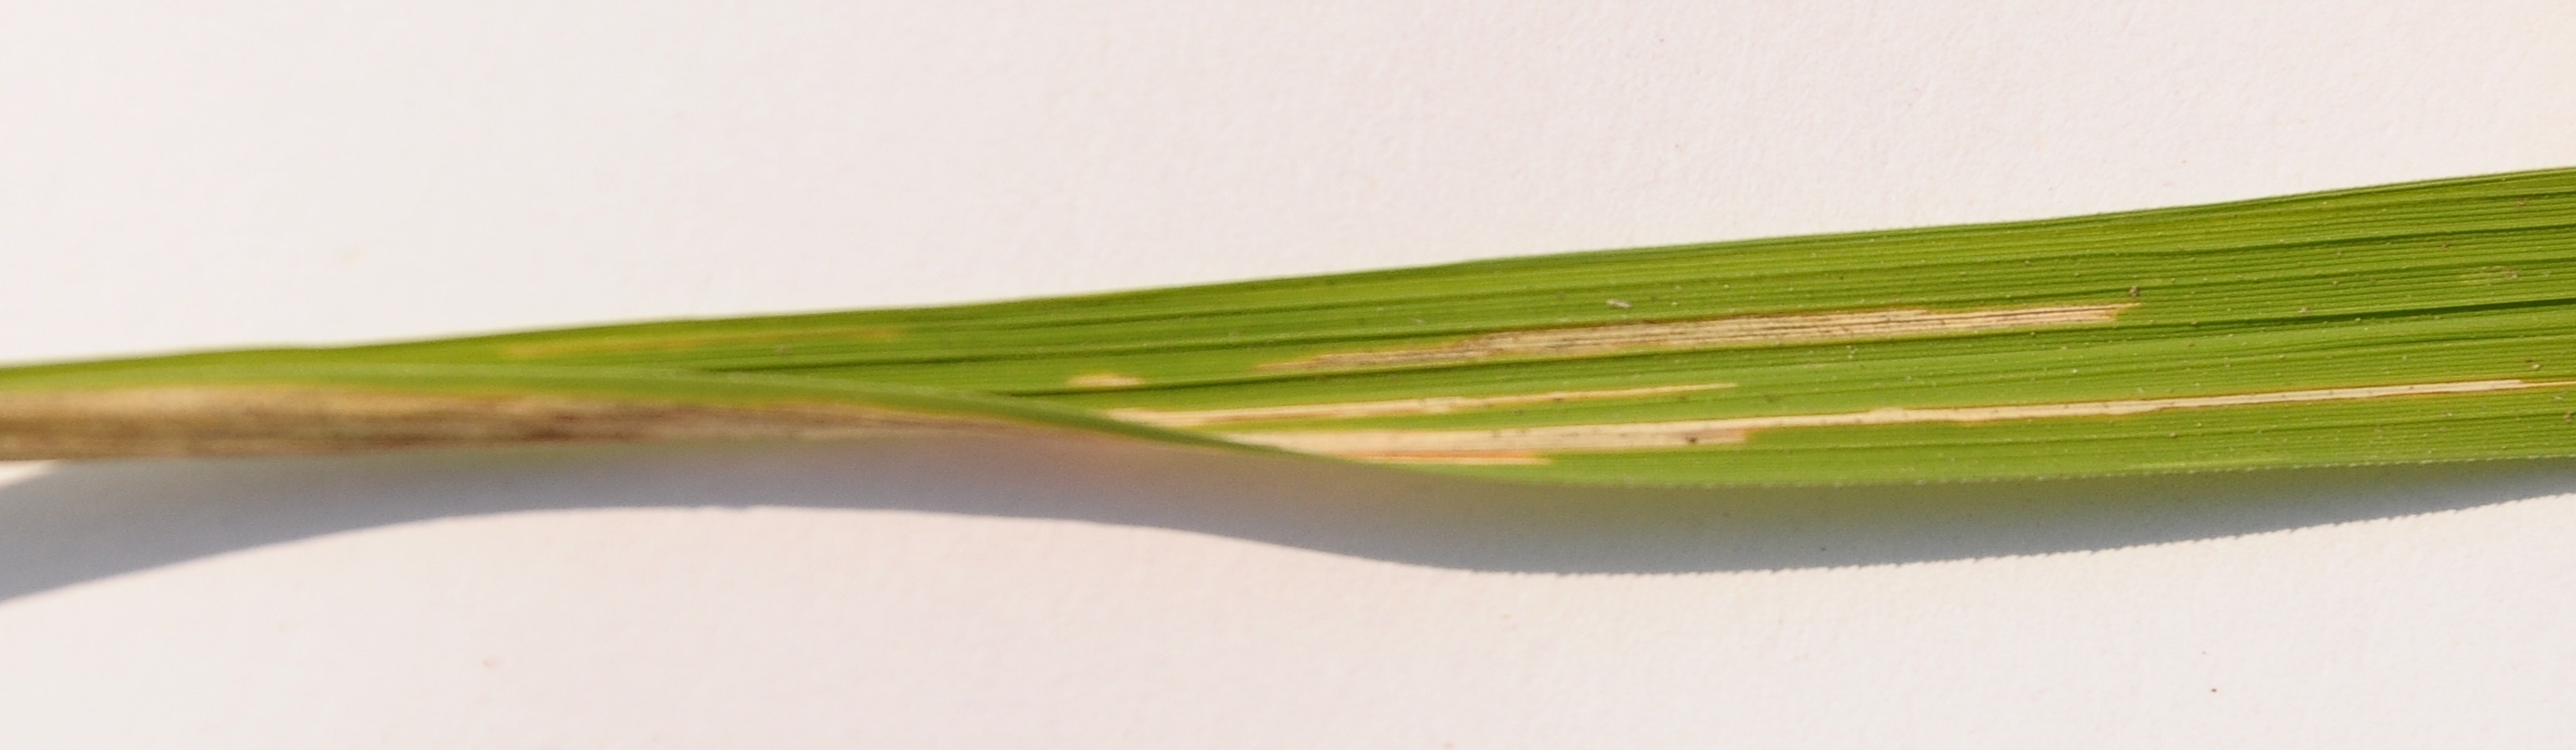

In [10]:
PIL.Image.open(str(bacteria[0]))

In [11]:
dict={"bacteria":list(data_dir.glob("Bacterial leaf blight/*")),"brown":list(data_dir.glob("Brown spot/*")),"smut":list(data_dir.glob("Leaf smut/*"))}

In [12]:


labels_dict = {
    'bacteria': 0,
    'brown': 1,
    'smut': 2,
   
}



In [18]:
X, y = [], []

for name, images in dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(labels_dict[name])


In [19]:
X = np.array(X)
y = np.array(y)

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [21]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [23]:
num_classes = 3
model = Sequential([
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model.fit(X_train_scaled, y_train, epochs=30)

2023-01-19 20:53:10.756507: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 34992000 exceeds 10% of free system memory.


Epoch 1/30


2023-01-19 20:53:14.283028: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 66355200 exceeds 10% of free system memory.
2023-01-19 20:53:14.869338: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 33177600 exceeds 10% of free system memory.
2023-01-19 20:53:15.938097: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 25660800 exceeds 10% of free system memory.
2023-01-19 20:53:16.415483: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 33177600 exceeds 10% of free system memory.


3/3 [==============================] - 6s 726ms/step - loss: 3.0245 - accuracy: 0.3333
Epoch 2/30
3/3 [==============================] - 2s 725ms/step - loss: 1.4542 - accuracy: 0.3222
Epoch 3/30
3/3 [==============================] - 2s 729ms/step - loss: 1.1858 - accuracy: 0.3222
Epoch 4/30
3/3 [==============================] - 3s 915ms/step - loss: 1.0673 - accuracy: 0.4000
Epoch 5/30
3/3 [==============================] - 2s 735ms/step - loss: 1.0931 - accuracy: 0.4333
Epoch 6/30
3/3 [==============================] - 3s 898ms/step - loss: 1.0329 - accuracy: 0.4333
Epoch 7/30
3/3 [==============================] - 2s 655ms/step - loss: 0.9723 - accuracy: 0.5778
Epoch 8/30
3/3 [==============================] - 2s 700ms/step - loss: 0.8960 - accuracy: 0.6556
Epoch 9/30
3/3 [==============================] - 3s 822ms/step - loss: 0.7873 - accuracy: 0.6778
Epoch 10/30
3/3 [==============================] - 2s 713ms/step - loss: 0.7274 - accuracy: 0.6778
Epoch 11/30
3/3 [=============

In [24]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 1s 726ms/step - loss: 1.6309 - accuracy: 0.5667


[1.6309348344802856, 0.5666666626930237]

In [25]:
predictions = model.predict(X_test_scaled)
predictions

1/1 [==============================] - 0s 303ms/step


array([[-5.99219990e+00,  1.18869543e+01,  2.66705465e+00],
       [-5.79711819e+00,  2.30758786e+00,  4.12591696e+00],
       [-6.35323668e+00,  3.18344665e+00,  4.69988346e+00],
       [ 7.00277901e+00, -1.21089280e+00, -6.97934198e+00],
       [-3.21078897e+00,  6.93785477e+00,  1.86847365e+00],
       [-3.73701245e-01,  3.29310918e+00, -1.00051332e+00],
       [ 9.82736349e-01,  2.74190068e+00, -2.24744749e+00],
       [ 3.92087436e+00, -2.82110006e-01, -4.18024874e+00],
       [-3.59079289e+00,  3.94399524e+00,  2.30752349e+00],
       [-5.23069715e+00,  4.45528126e+00,  4.04774237e+00],
       [-2.68708086e+00,  4.63499784e+00,  8.22546244e-01],
       [-4.45183897e+00,  5.95332241e+00,  2.62204289e+00],
       [ 2.22200990e+00,  2.40306067e+00, -3.42692971e+00],
       [-1.13473644e+01,  7.22384119e+00,  7.73345661e+00],
       [-1.03560658e+01,  2.71855021e+00,  7.88660860e+00],
       [-2.15187120e+00,  6.36807442e+00, -1.37634361e+00],
       [-6.44634485e-01,  4.81891727e+00

In [26]:
score = tf.nn.softmax(predictions[0])

In [27]:
np.argmax(score)

1

In [28]:
data_augmentation = keras.Sequential(
  [

    layers.experimental.preprocessing.RandomZoom(0.2),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomFlip("horizontal")
  ]
)

In [29]:
num_classes = 3

model = Sequential([
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.1),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [30]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
              
model.fit(X_train_scaled, y_train, epochs=40)

Epoch 1/40
3/3 [==============================] - 12s 929ms/step - loss: 1.2814 - accuracy: 0.3444
Epoch 2/40
3/3 [==============================] - 3s 832ms/step - loss: 1.2196 - accuracy: 0.3444
Epoch 3/40
3/3 [==============================] - 3s 856ms/step - loss: 1.0481 - accuracy: 0.3889
Epoch 4/40
3/3 [==============================] - 2s 762ms/step - loss: 1.0000 - accuracy: 0.5556
Epoch 5/40
3/3 [==============================] - 3s 863ms/step - loss: 0.9562 - accuracy: 0.5778
Epoch 6/40
3/3 [==============================] - 3s 829ms/step - loss: 0.9303 - accuracy: 0.6000
Epoch 7/40
3/3 [==============================] - 3s 834ms/step - loss: 0.8394 - accuracy: 0.6778
Epoch 8/40
3/3 [==============================] - 3s 829ms/step - loss: 0.8323 - accuracy: 0.6000
Epoch 9/40
3/3 [==============================] - 2s 825ms/step - loss: 0.7715 - accuracy: 0.6778
Epoch 10/40
3/3 [==============================] - 3s 872ms/step - loss: 0.8181 - accuracy: 0.6444
Epoch 11/40
3/3 [=

In [31]:
model.evaluate(X_test_scaled,y_test)

1/1 [==============================] - 0s 379ms/step - loss: 0.5937 - accuracy: 0.8333


[0.5937483906745911, 0.8333333134651184]

In [32]:
import pickle

In [36]:
pickle.dump(model, open("../../models/first_cnn.pkl", 'wb'))

Keras weights file (<HDF5 file "variables.h5" (mode r+)>) saving:
...layers
......conv2d
.........vars
............0
............1
......conv2d_1
.........vars
............0
............1
......conv2d_2
.........vars
............0
............1
......dense
.........vars
............0
............1
......dense_1
.........vars
............0
............1
......dropout
.........vars
......flatten
.........vars
......max_pooling2d
.........vars
......max_pooling2d_1
.........vars
......max_pooling2d_2
.........vars
......sequential
.........layers
............random_flip
...............vars
............random_rotation
...............vars
............random_zoom
...............vars
.........vars
...metrics
......mean
.........vars
............0
............1
......mean_metric_wrapper
.........vars
............0
............1
...optimizer
......vars
.........0
.........1
.........10
.........11
.........12
.........13
.........14
.........15
.........16
.........17
.........18
.........19
..

In [ ]:
loaded_model = pickle.load(open("../../"))